In [1]:
import pandas as pd
import numpy as np
import faiss
from sentence_transformers import SentenceTransformer
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

c:\Users\Admin\Desktop\University\UQ\projects\LLM-Power Knowledge Miner\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded 471 chunks


Batches: 100%|██████████| 15/15 [03:17<00:00, 13.15s/it]


Embeddings shape: (471, 768)
FAISS index saved to ../models/embeddings.faiss

Top 3 results:
- for partial correlation is : 𝜌𝑖𝑗|𝑜𝑡ℎ𝑒𝑟=−Ω𝑖𝑗 √Ω𝑖𝑖Ω𝑗𝑗 Therefore the partial correlation is : [1 −0,03929171 0.15511828 0.02223713 −0,03929171 1 0.3398141 0.52446734 0.15511828 0.3398141 1 0.00522477 0.0 ...

- optimal number of PCs for this particularly dataset, there are two ways to determine this; the first is the eblow rule which indicates that we keep all PCs up until the eigenvalues drop, inclusive, an ...

- Q1 a) Below are the four explanatory variables ’ density plots along with a normal distribution overlay. Each graph has a legend which shows the mean, standard deviation and variance of each variable. ...



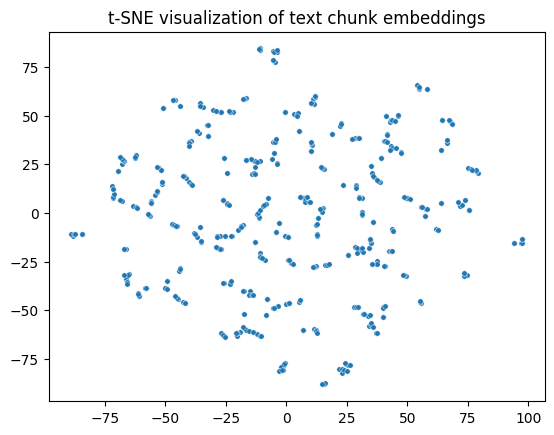

In [7]:
# 1. Load cleaned chunks
DATA_PATH = "../data/processed/chunks.csv"
df = pd.read_csv(DATA_PATH)
print(f"Loaded {len(df)} chunks")

# 2. Create embeddings
model = SentenceTransformer("all-mpnet-base-v2")  
embeddings = model.encode(df["text"].tolist(), show_progress_bar=True)
embeddings = np.array(embeddings).astype("float32")
print("Embeddings shape:", embeddings.shape)

# 3. Build FAISS index
index = faiss.IndexFlatL2(embeddings.shape[1])  # L2 = Euclidean similarity
index.add(embeddings)
faiss.write_index(index, "../models/embeddings.faiss")
df.to_csv("../data/processed/chunks_embedded.csv", index=False)
print("FAISS index saved to ../models/embeddings.faiss")

# 4. Optional: Quick test search
query = "What is the partial correlation"
q_emb = model.encode([query])
D, I = index.search(np.array(q_emb).astype("float32"), k=3)
print("\nTop 3 results:")
for idx in I[0]:
    print("-", df.iloc[idx]["text"][:200], "...\n")

# 5. (Optional) Visualize embeddings distribution
subset = embeddings[:1000] if len(embeddings) > 1000 else embeddings
reduced = TSNE(n_components=2, perplexity=3, random_state=42).fit_transform(subset)
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], s=15)
plt.title("t-SNE visualization of text chunk embeddings")
plt.show()